In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
Housing_Melb = pd.read_excel('/home/Housing prices.xlsx')

In [3]:
Housing_Melb.head(5)

,House,Selling Price,Location,Number of Rooms
0,1,345,0,8
1,2,655,0,9
2,3,325,1,7
3,4,478,0,4
4,5,432,1,10


In [4]:
Housing_Melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   House            20 non-null     int64
 1   Selling Price    20 non-null     int64
 2   Location         20 non-null     int64
 3   Number of Rooms  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes


In [5]:
Housing_Melb.describe()

,House,Selling Price,Location,Number of Rooms
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,510.900000,0.500000,8.500000
std,5.91608,239.498797,0.512989,2.544344
min,1.00000,199.000000,0.000000,4.000000
25%,5.75000,321.750000,0.000000,6.750000
50%,10.50000,455.000000,0.500000,9.000000
75%,15.25000,658.750000,1.000000,10.000000
max,20.00000,988.000000,1.000000,13.000000


In [6]:
Housing_Melb['Location'].value_counts()

0    10
1    10
Name: Location, dtype: int64

In [8]:
list(Housing_Melb.columns)

['House', 'Selling Price', 'Location', 'Number of Rooms']

Text(0.5, 1.0, 'Selling Price vs. Number of Rooms')

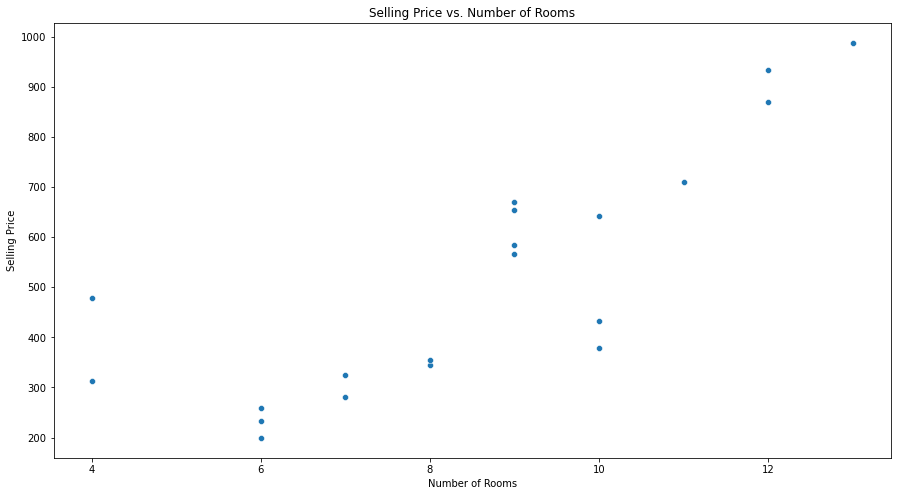

In [9]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="Number of Rooms", y="Selling Price", data=Housing_Melb)
ax.set_title("Selling Price vs. Number of Rooms");

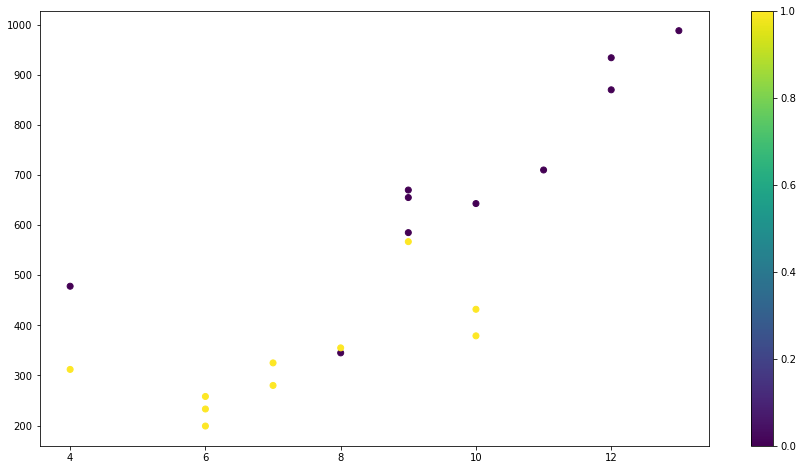

In [10]:

fig, ax = plt.subplots(figsize=(15,8))
scat = ax.scatter(y=Housing_Melb['Selling Price'],x=Housing_Melb["Number of Rooms"], c=Housing_Melb["Location"], marker='o')
fig.colorbar(scat)


plt.show()

**add a best-fit line to a scatterplot**

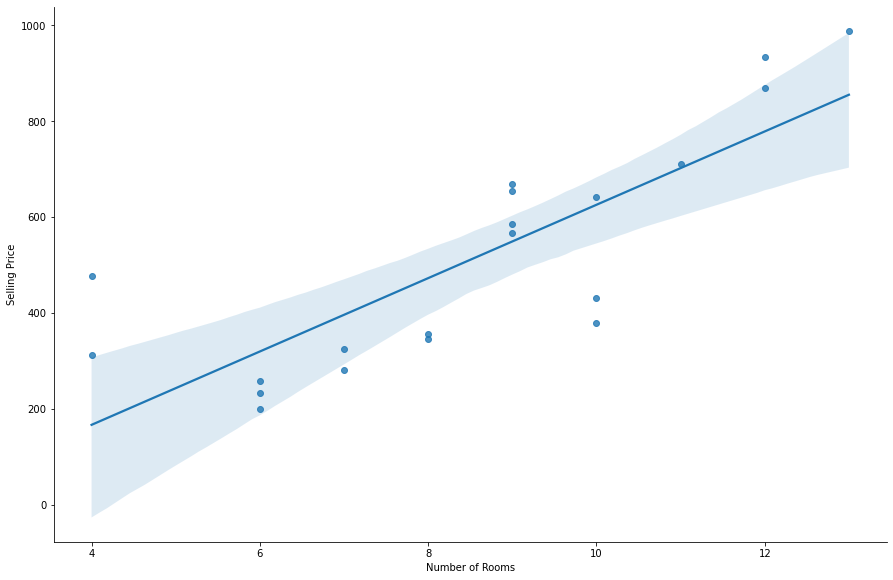

In [11]:
#plt.figure(figsize=(15,8))
ax = sns.lmplot(x="Number of Rooms", y="Selling Price", data=Housing_Melb)

ax.fig.set_figwidth(14.27)
ax.fig.set_figheight(8.7)

**Adding color as a third dimension** 


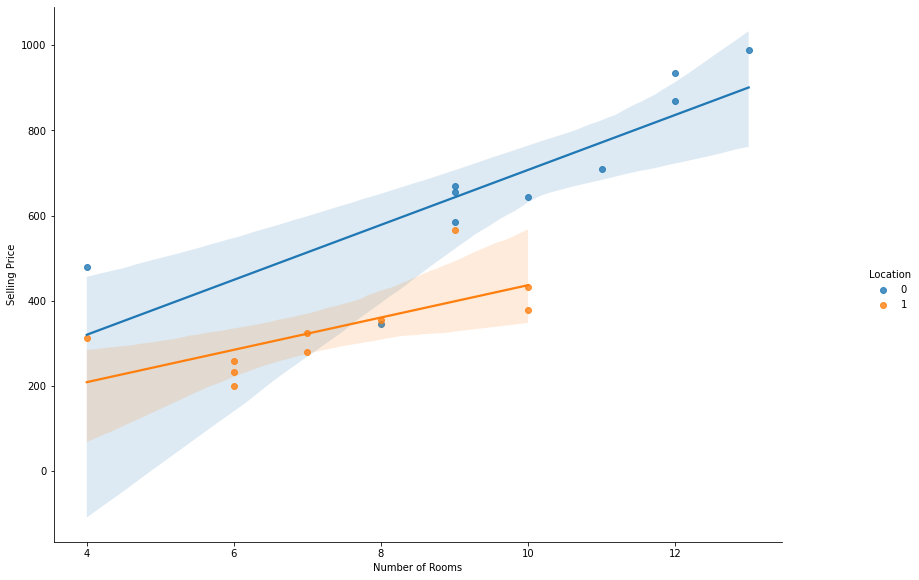

In [12]:
ax = sns.lmplot(x="Number of Rooms", y="Selling Price", hue="Location", data=Housing_Melb)
ax.fig.set_figwidth(14.27)
ax.fig.set_figheight(8.7);

In [13]:
from scipy import stats
stats.pearsonr(Housing_Melb['Selling Price'], Housing_Melb['Number of Rooms'])

(0.8133545082780578, 1.2970692206298644e-05)

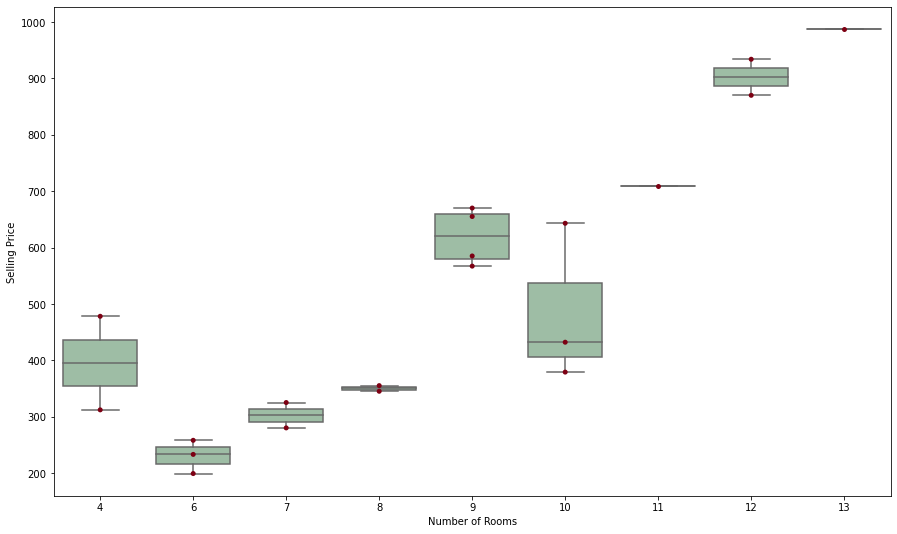

In [14]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x="Number of Rooms", y='Selling Price', data=Housing_Melb, color='#99c2a2')
ax = sns.swarmplot(x="Number of Rooms", y='Selling Price', data=Housing_Melb, color='#7d0013')
plt.show()

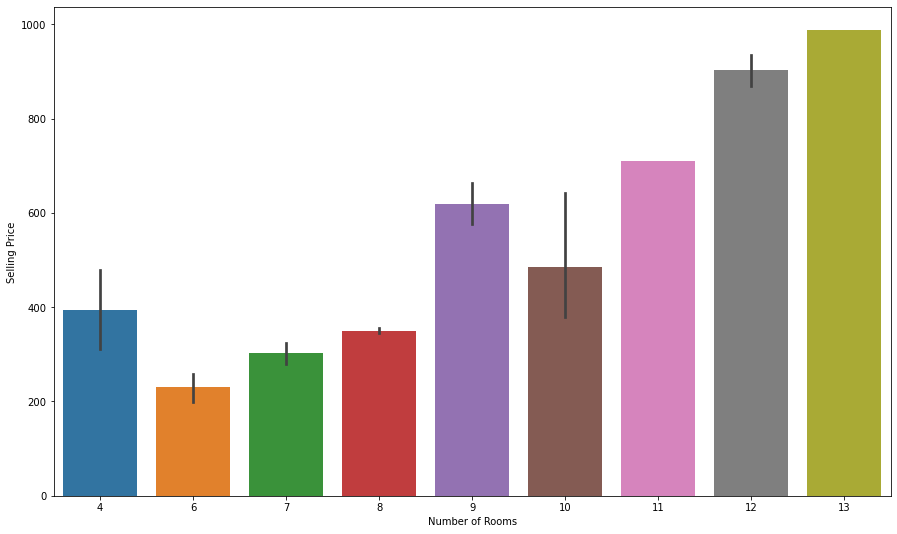

In [15]:
plt.figure(figsize=(15,9))
sns.barplot(data=Housing_Melb, x="Number of Rooms", y='Selling Price')
plt.show()

var = 'OverallQual'
data = Housing_Melb
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="Selling Price", data=data)
fig.axis(ymin=0, ymax=800000);

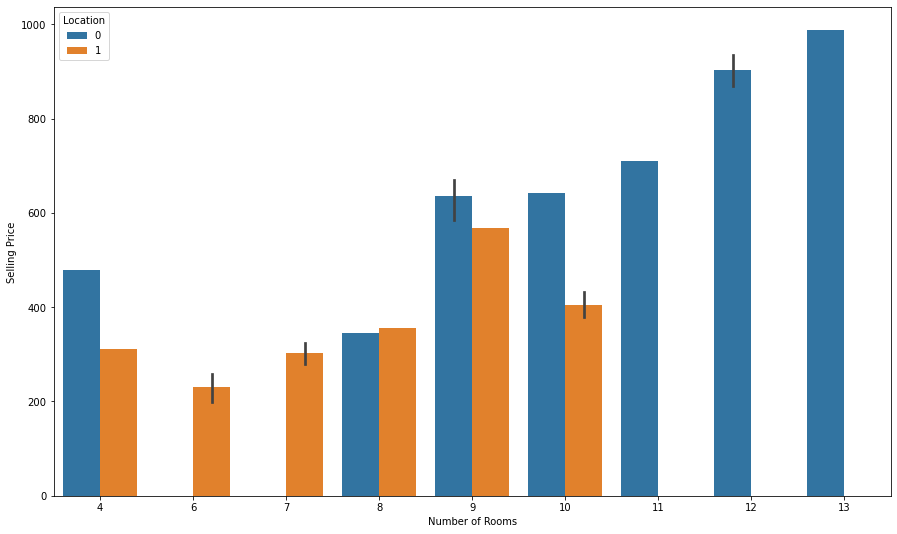

In [16]:
plt.figure(figsize=(15,9))
sns.barplot(data=Housing_Melb, x="Number of Rooms", y='Selling Price', hue="Location")
plt.show()

In [17]:
from sklearn import linear_model
x = Housing_Melb[["Number of Rooms","Location"]]
y = Housing_Melb['Selling Price']
regr = linear_model.LinearRegression()
regr.fit(x, y)
regr.score(x, y)
print(f'The intercept is:', regr.intercept_)
print(f'The slopes are:', regr.coef_)
print(f'The score is', regr.score(x, y))

The intercept is: 155.28853503184695
The slopes are: [  54.89808917 -222.04458599]
The score is 0.8347806595317093


In [18]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling Price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     42.95
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           2.26e-07
Time:                        17:58:22   Log-Likelihood:                -119.43
No. Observations:                  20   AIC:                             244.9
Df Residuals:                      17   BIC:                             247.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             155.2885    107.883     

In [19]:
predicted = regr.predict([[9, 0]])

print(predicted)

[649.37133758]


/usr/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
from scipy import stats
stats.pearsonr(Housing_Melb['Selling Price'], Housing_Melb['Number of Rooms'])

(0.8133545082780578, 1.2970692206298644e-05)

In [21]:
cormat = Housing_Melb.corr()
round(cormat,2)

,House,Selling Price,Location,Number of Rooms
House,1.00,0.15,-0.03,0.14
Selling Price,0.15,1.00,-0.76,0.81
Location,-0.03,-0.76,1.00,-0.48
Number of Rooms,0.14,0.81,-0.48,1.00


<AxesSubplot:>

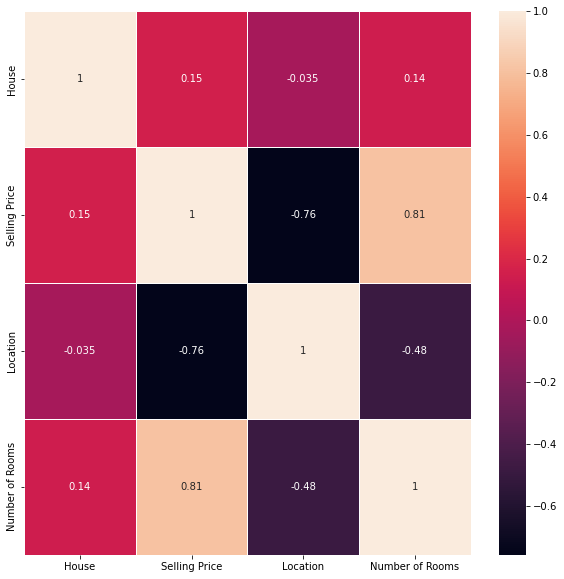

In [22]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(cormat, annot=True, linewidths=.5, ax=ax)

#sns.heatmap(cormat);

In [24]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(Housing_Melb['Selling Price'],Housing_Melb["Number of Rooms"], Housing_Melb["Location"])
print(fvalue, pvalue)

89.42130338879778 2.646663889517047e-18


In [25]:
sp = Housing_Melb['Selling Price']
nr = Housing_Melb["Number of Rooms"]
lo = Housing_Melb["Location"]
import scipy.stats as st

def f_test(sp, nr, alt="two_sided"):
   
    df1 = len(sp) - 1
    df2 = len(nr) - 1
    f = sp.var() / nr.var()
    if alt == "greater":
        p = 1.0 - st.f.cdf(f, df1, df2)
    elif alt == "less":
        p = st.f.cdf(f, df1, df2)
    else:
        # two-sided by default
        # Crawley, the R book, p.355
        p = 2.0*(1.0 - st.f.cdf(f, df1, df2))
    return f, p

In [26]:
f_test(sp, nr, 'two_sided')

(8860.437398373984, 2.220446049250313e-16)

In [27]:
sp = Housing_Melb['Selling Price']
nr = Housing_Melb["Number of Rooms"]
lo = Housing_Melb["Location"]
import scipy.stats as st

def f_test(sp, lo, alt="two_sided"):
   
    df1 = len(sp) - 1
    df2 = len(lo) - 1
    f = sp.var() / lo.var()
    if alt == "greater":
        p = 1.0 - st.f.cdf(f, df1, df2)
    elif alt == "less":
        p = st.f.cdf(f, df1, df2)
    else:
        # two-sided by default
        # Crawley, the R book, p.355
        p = 2.0*(1.0 - st.f.cdf(f, df1, df2))
    return f, p

In [28]:
f_test(sp, lo, 'two_sided')

(217966.76000000004, 2.220446049250313e-16)

In [29]:
Housing_Melb['Inter_erm'] = Housing_Melb["Number of Rooms"] * Housing_Melb["Location"]
Housing_Melb

,House,Selling Price,Location,Number of Rooms,Inter_erm
0,1,345,0,8,0
1,2,655,0,9,0
2,3,325,1,7,7
3,4,478,0,4,0
4,5,432,1,10,10
5,6,233,1,6,6
6,7,567,1,9,9
7,8,988,0,13,0
8,9,199,1,6,6
9,10,934,0,12,0


In [30]:
x = Housing_Melb[["Number of Rooms","Location",'Inter_erm']]
y = Housing_Melb['Selling Price']
regr = linear_model.LinearRegression()
regr.fit(x, y)
regr.score(x, y)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     29.96
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           8.45e-07
Time:                        17:58:22   Log-Likelihood:                -118.54
No. Observations:                  20   AIC:                             245.1
Df Residuals:                      16   BIC:                             249.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              61.9967    130.940     